In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11],
              [1,3],
              [8,9],
              [0,3],
              [5,4],
              [6,4],])

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()



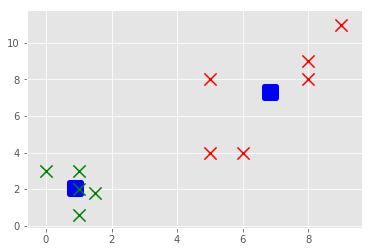

In [2]:
colors = 10*["g","r","c","b","k"]


class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            # Phase 1: find closest centroid to each data point x    
            for x in data:
                distances = [np.linalg.norm(x-self.centroids[centroid]) for centroid in self.centroids]
                closest_centroid = distances.index(min(distances))
                self.classifications[closest_centroid].append(x)
            prev_centroids = dict(self.centroids)
            
            # Phase 1: Update centroids to the average of its followers
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            # iterate until convergence to tol(tolerance) value    
            convergence = True
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                differ = current_centroid-original_centroid
                differ2 = differ.dot(differ.T)
                # still not convergence
                if differ2 > self.tol: convergence = False
            # converged exit
            if convergence: break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification


clf = K_Means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="s", color="b", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)

##unknowns = np.array([[1,3],
##                     [8,9],
##                     [0,3],
##                     [5,4],
##                     [6,4],])
##
##for unknown in unknowns:
##    classification = clf.predict(unknown)
##    plt.scatter(unknown[0], unknown[1], marker="*", color=colors[classification], s=150, linewidths=5)
##

plt.show()